In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
path = r"/content/Airlines+Data.xlsx"

In [ ]:
data = pd.read_excel(path)

In [ ]:
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')

In [ ]:
data.set_index('Month', inplace=True)

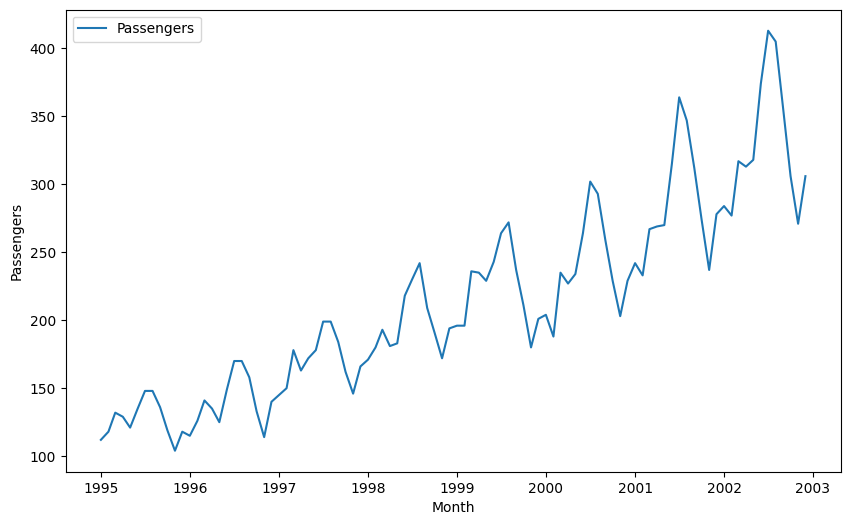

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [ ]:
result = seasonal_decompose(data, model='additive', period=12)

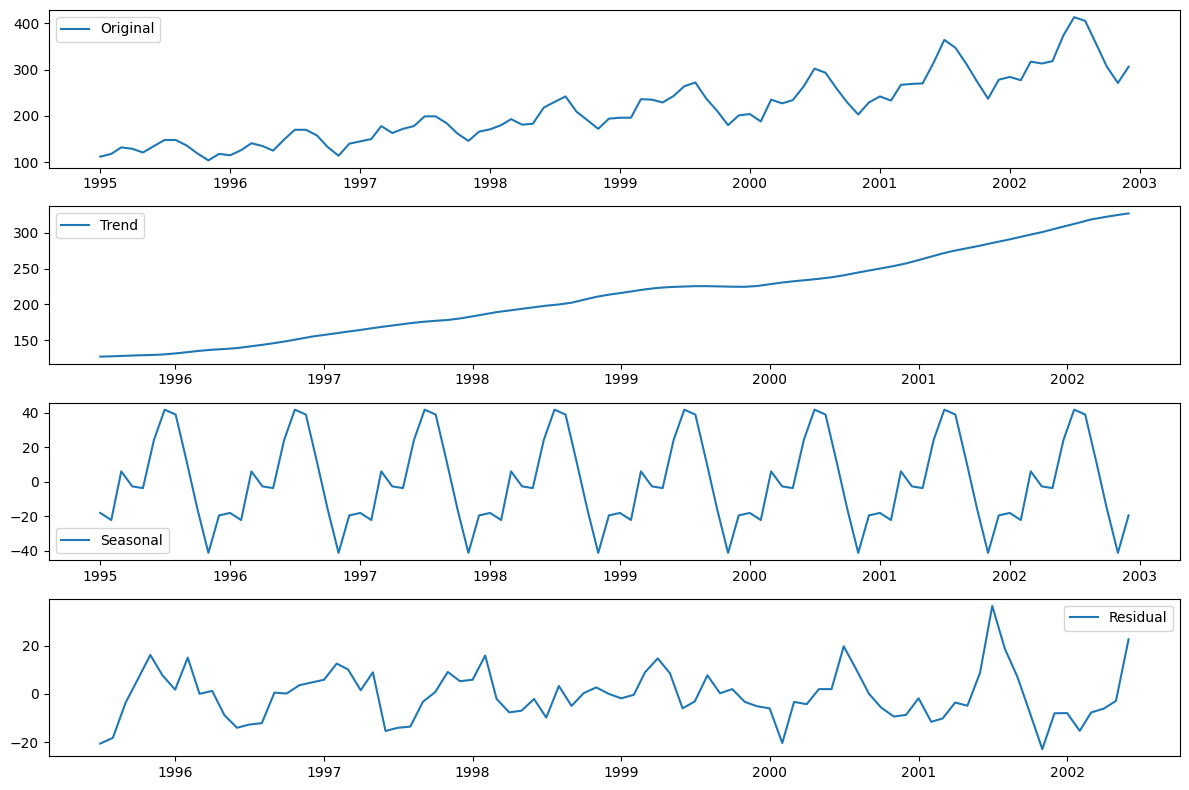

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Original')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def adf_test(timeseries):

    result = adfuller(timeseries)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")

adf_test(data['Passengers'])

ADF Statistic: 1.3402479596467138
p-value: 0.9968250481137263
Critical Values:
1%: -3.5117123057187376
5%: -2.8970475206326833
10%: -2.5857126912469153


In [ ]:
sma_window = 12
data['SMA'] = data['Passengers'].rolling(window=sma_window).mean()

In [ ]:
ema_window = 12
data['EMA'] = data['Passengers'].ewm(span=ema_window, adjust=False).mean()

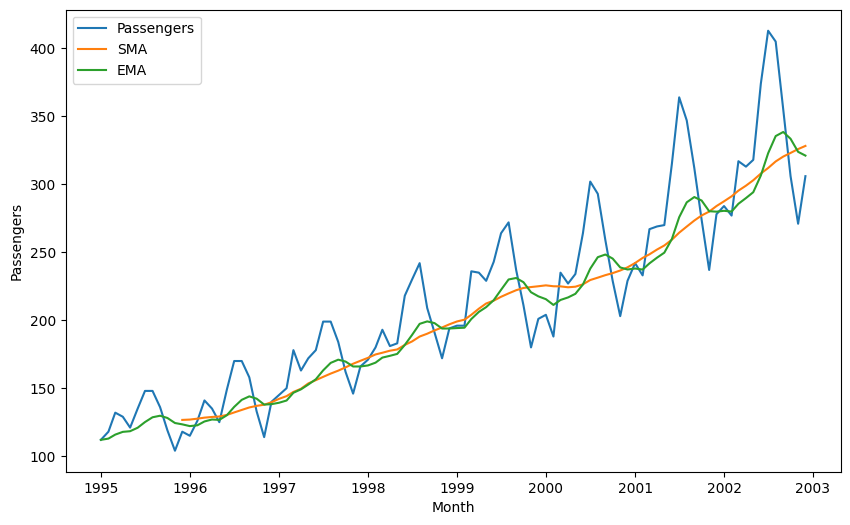

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label='Passengers')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['EMA'], label='EMA')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [ ]:
model = ARIMA(data['Passengers'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
n_forecast = 12
forecast = model_fit.forecast(steps=n_forecast)

In [ ]:
rmse_arima = np.sqrt(mean_squared_error(data['Passengers'][-n_forecast:], forecast))
print("RMSE for ARIMA:", rmse_arima)

RMSE for ARIMA: 47.113945754680074


In [ ]:
model_sarima = SARIMAX(data['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast_sarima = model_sarima_fit.forecast(steps=n_forecast)

In [ ]:
rmse_sarima = np.sqrt(mean_squared_error(data['Passengers'][-n_forecast:], forecast_sarima))
print("RMSE for SARIMA:", rmse_sarima)

RMSE for SARIMA: 30.083158704056096


In [ ]:
if rmse_arima < rmse_sarima:
    print("ARIMA is the preferred model for forecasting.")
else:
    print("SARIMA is the preferred model for forecasting.")

SARIMA is the preferred model for forecasting.
